# Notebook 17: Introduction to P-Values
***

We'll need Numpy, Matplotlib, and scipy.stats for this notebook, so let's load them. 

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pylab as plt 
%matplotlib inline

### Exercise 1 - Concept Check
*** 

Suppose there is a random variable $X$ with a **triangular distribution** $f(x)$ given by

$f(x) =
\begin{cases} cx & 0 \leq x \leq \dfrac{1}{2} \\
              c(1-x) & \dfrac{1}{2} \leq x \leq 1 \\
              0 & \text{otherwise}
\end{cases}$

where $c$ is some normalizing constant.

**Part A:** What value should $c$ have in order for $f(x)$ to be a proper probability density function?

**Solution:**

$c$ needs to be chosen such that the integral of $f$ from $0$ to $1$ is equal to $1$ (since $f(x)=0$ outside of $[0,1]$). 

$\dfrac{1}{2} \stackrel{\heartsuit}{=} \int_0^{1/2} cx\ dx = \dfrac{1}{2}cx^2 \bigg|_0^{1/2} = \dfrac{1}{2}c\left(\dfrac{1}{2}\right)^2 = \dfrac{c}{8} ~~\longrightarrow~~ \fbox{$c=4$}$

We can check this based on the fact that the distribution is a triangle with base width 1 and height $f(1/2) = 4\cdot \dfrac{1}{2} = 2$, so it has area $\dfrac{1}{2} \cdot 1 \cdot 2 = 1~~\checkmark$

**Part B:** Suppose you wish to test the hypothesis that the mean of the distribution for $X$ is equal to $1/2$ against the alternative hypothesis that this mean is *not* equal to $1/2$. You collect some data for $X$ and find a test statistic $\hat{X} = 3/4$.

Recall the a p-value is the probability of observing a test statistic as extreme or more extreme than our measurement (which is $3/4$ here). "More extreme" than our test statistic means anything equally or less likely to observe than $3/4$: so, $X \geq 3/4$ and $X \leq 1/4$. Sketch a picture to depict the p-value associated with our hypothesis test. Shade in the area that corresponds to the p-value.

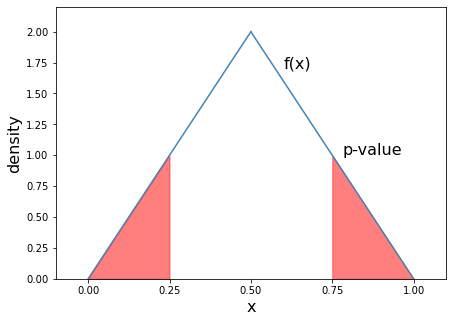

0.6914624612740131


In [3]:
x1 = np.array([0,0.25,0.5])
x2 = np.array([0.5,0.75,1])
y1 = 4*x1
y2 = 4*(1-x2)
xp = [0.75,1]
yp = [1.25, 1.5]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
plt.plot(x1,y1,color='steelblue')
plt.plot(x2,y2,color='steelblue')
ax.fill_between(x1[:2], y1[:2], color='red', alpha=0.5)
ax.fill_between(x2[1:], y2[1:], color='red', alpha=0.5)
ax.set_xlim([-0.1,1.1])
ax.set_ylim([0,2.2])
ax.set_xticks([0,.25,.5,.75,1])
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('density', fontsize=16)
ax.text(0.6,1.7,'f(x)', fontsize=16)
ax.text(0.78,1,'p-value', fontsize=16)
plt.show()

**Part C:** Compute the p-value associated with our hypothesis test.

**Solution:**

$\begin{align*}
  \text{p-value} &= \int_0^{1/4} f(x)\ dx + \int_{3/4}^1 f(x)\ dx \\
                 &= \int_0^{1/4} 4x\ dx + \int_{3/4}^1 (4-4x)\ dx \\
                 &= 2x^2 \bigg|_0^{1/4} + (4x-2x^2)\bigg|_{3/4}^1 \\
                 &= 2\cdot \dfrac{1}{16} + (4-2) - \left(4\cdot \dfrac{3}{4} - 2\cdot \dfrac{9}{16}\right) \\
                 &= \dfrac{1}{8} + 2 - \left(3 - \dfrac{9}{8}\right) \\
                 &= \dfrac{17}{8} - \dfrac{15}{8} = \dfrac{2}{8} = \fbox{$0.25$}
\end{align*}$

Again, we can check this using the fact that each tail of the p-value area is a triangle with base length $1/4$ and height $4\cdot 1/4 = 1$, so the total area is $2 \cdot \dfrac{1}{2}\cdot \dfrac{1}{4}\cdot 1 = \dfrac{1}{4}~~\checkmark$

### Exercise 2 - Estimating the Distribution of P-Values 
*** 

Suppose you have a population that is normally distributed with mean $\mu_0$ and standard deviation $\sigma$. In this problem you will simulate many draws from this distribution with a particular sample size and compute p-values for the alternate hypothesis that that $\mu \neq \mu_0$. Finish the function below in order to sample `sample_size` number of p-values.

Then, plot a histogram of the sampled p-values. Set the bin width to be equal to the significance level $\alpha$. What can you say about the distribution of p-values in the case where the Null hypothesis is actually true?  About what proportion of the sampled p-values are such that $p \leq \alpha$?      

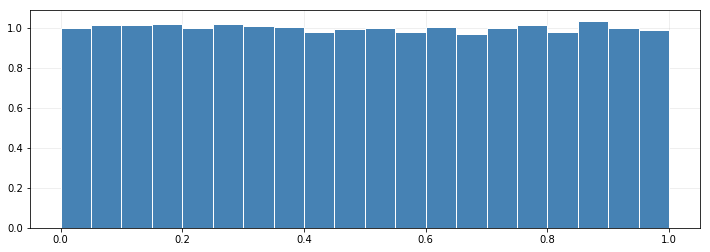

In [3]:
def pvalue_dist(num_tests=10000, sample_size=100, mu0=20, sig=2, alpha=0.05):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
    bins = np.linspace(0, 1, int(1/alpha)+1)
    ps = np.zeros(num_tests)
    for ii in range(num_tests):
        xbar = np.mean(stats.norm.rvs(mu0,sig,size=sample_size))
        z = (xbar-mu0)/(sig/np.sqrt(sample_size))
        ps[ii] = 2*np.min([stats.norm.cdf(z), 1-stats.norm.cdf(z)])
    pd.Series(ps).hist(ax=ax, color="steelblue", edgecolor="white", bins=bins, density=True)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    
pvalue_dist(num_tests=int(1e5), sample_size=500)

When the null hypothesis is true, the distribution of p-values is is uniform.  Since the bin width is equal to the significance level $\alpha$ we know that the the proportion of p-values that are less than or equal to $\alpha$ is exactly $\alpha$. 